In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('DelayFlights_clean.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df['Date'] =pd.to_datetime(df['Date'])
df.head()

,Date,DayOfWeek,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,Thursday,WN,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0
1,2008-01-03,Thursday,WN,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2,2008-01-03,Thursday,WN,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
3,2008-01-03,Thursday,WN,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0
4,2008-01-03,Thursday,WN,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0


### Nivell 1

# Exercici 1

Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

# PREPROCESING

In [14]:
target = df['ArrDelay']

In [15]:
# quines variables fem servir pels features (X)?

In [40]:
#agafem variables numeriques
X = df[['ActualElapsedTime','CRSElapsedTime','AirTime','DepDelay','Distance','TaxiIn','TaxiOut','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
X =X.drop_duplicates()

In [41]:
X.head()

,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,128.0,150.0,116.0,8.0,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0
1,128.0,145.0,113.0,19.0,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2,90.0,90.0,77.0,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
3,101.0,115.0,87.0,25.0,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0
4,240.0,250.0,230.0,67.0,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0


<AxesSubplot:>

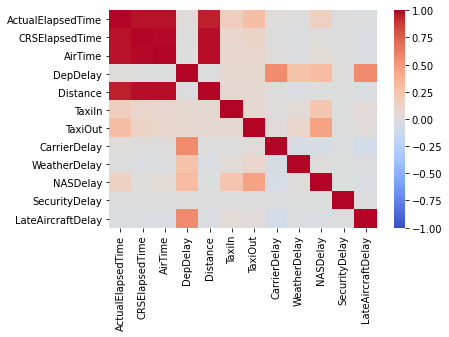

In [42]:
# existeix alguna correlació entre aquestes variables numeriques?
corr = X.corr()

sns.heatmap(corr,cmap='coolwarm',vmax=1, vmin=-1)


+ seleccionem aquelles variables independents i que no tinguin relacio al model final
+ ActualElapsedTime and CRSElapsedTime estan molt relacionades
+ AirTime i Distance tambe estan molt relaciondes
+ DepDelay y CarrierDelay o LateAircraft Delay tambe hi ha força correlacio. Anem a explorar-ho


<AxesSubplot:xlabel='DepDelay', ylabel='LateAircraftDelay'>

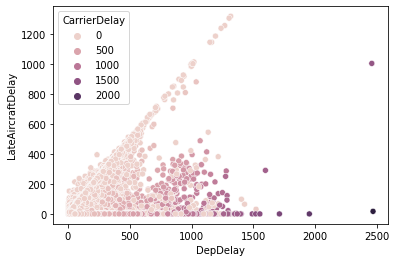

In [46]:
sns.scatterplot(x='DepDelay', y='LateAircraftDelay',hue='CarrierDelay',data=X)

In [47]:
# hi han força outliers, pero per carrier delays < 1000  hi ha una correlacio important entre aquestes variables

In [61]:
columns_2_remove = ['CRSElapsedTime','AirTime','Distance']

In [62]:
X_features = X.drop(columns_2_remove,axis=1)

<AxesSubplot:>

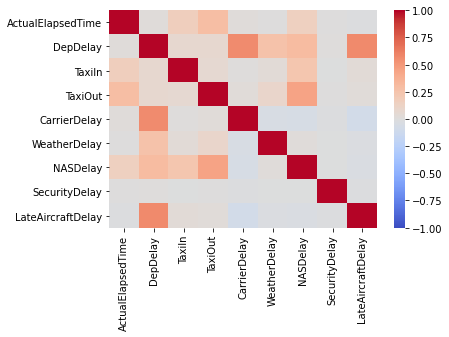

In [63]:
corr = X_features.corr()

sns.heatmap(corr,cmap='coolwarm',vmax=1, vmin=-1)

In [64]:
X_features.head()

,ActualElapsedTime,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,128.0,8.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0
1,128.0,19.0,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2,90.0,34.0,3.0,10.0,2.0,0.0,0.0,0.0,32.0
3,101.0,25.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0
4,240.0,67.0,3.0,7.0,10.0,0.0,0.0,0.0,47.0


In [65]:
# anem a mirar la distribucio de punts 

In [ ]:
sns.pairplot(X_features)

In [46]:
def get_X_y_from_dataset(dataframe,target_colum):
    X = dataframe.drop(target_colum,axis=1)    
    y = dataframe[[target_colum]]    
    print(X.shape,y.shape)
    return X,y

X,y = get_X_y_from_dataset(dataframe=df_subset,target_colum='ArrDelay')

(1857423, 9) (1857423, 1)


In [47]:
X.head()

,ActualElapsedTime,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,128.0,8.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0
1,128.0,19.0,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2,90.0,34.0,3.0,10.0,2.0,0.0,0.0,0.0,32.0
3,101.0,25.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0
4,240.0,67.0,3.0,7.0,10.0,0.0,0.0,0.0,47.0


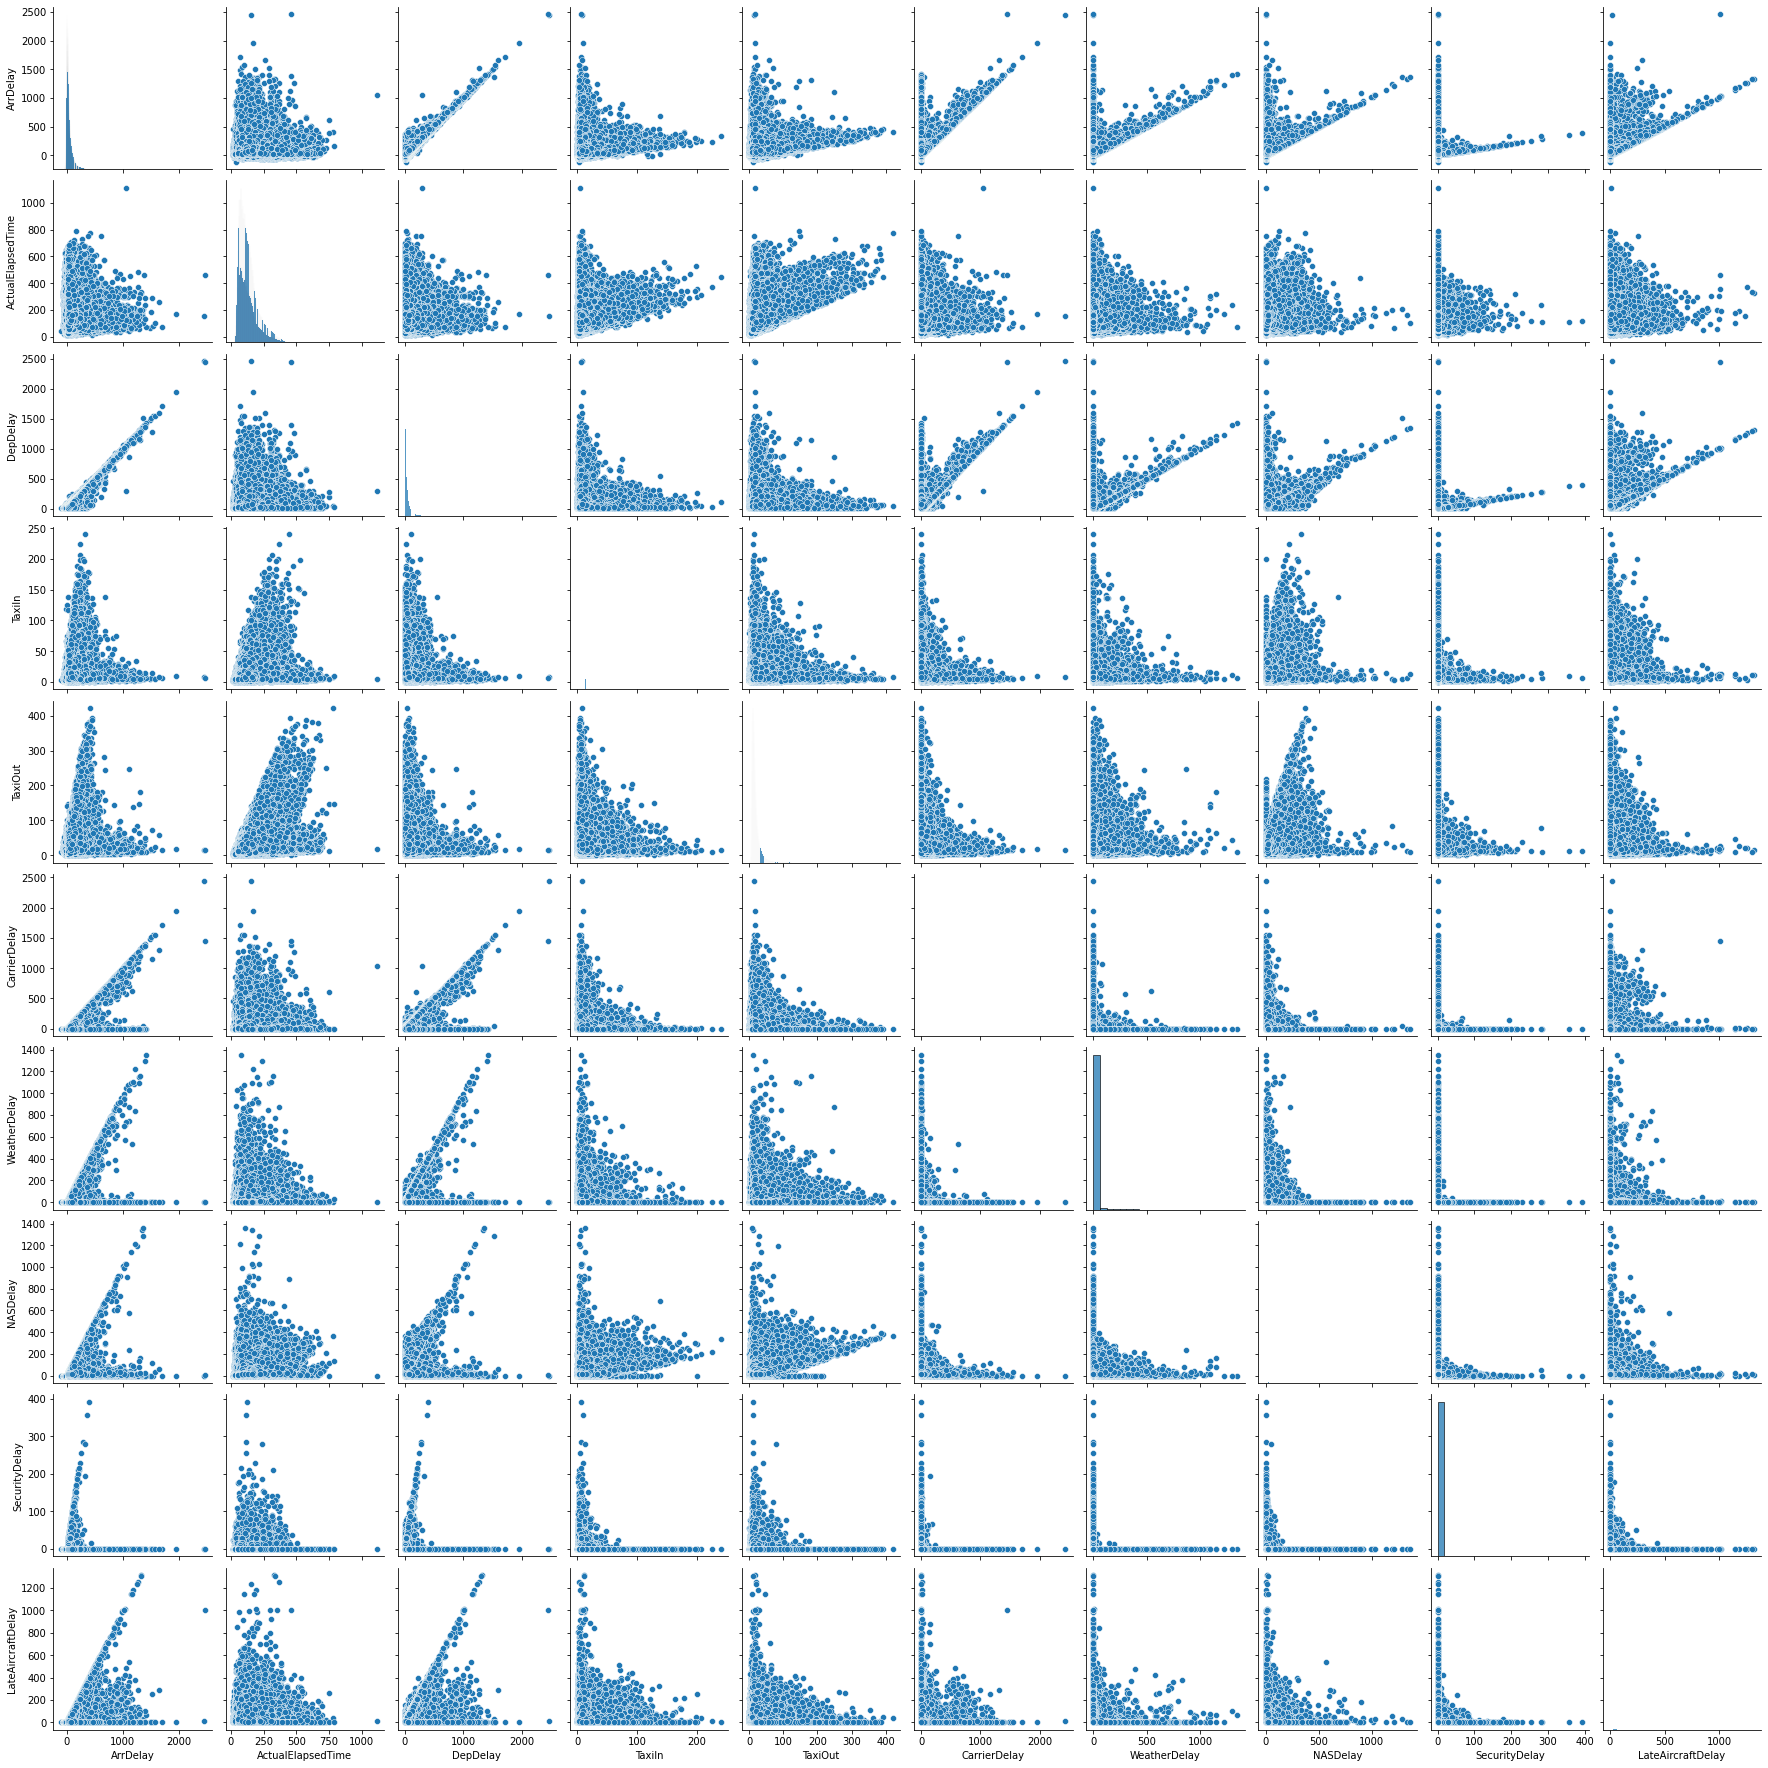

In [11]:
sns.pairplot(df_subset)

In [1]:
# DeptDelay esta fuertemente relacionada con ArrDelay (que es lo que queremos predecir)

In [12]:
# model de regressio 1: lineal
from sklearn.linear_model import LinearRegression
# metode lineal basat en Ordinary Least Squares (OLS)
linear_model = LinearRegression()

[-0.00843741  0.11284107  0.04431357  0.08333493  0.87957934  0.88081277
  0.89410095  0.5131758   0.8771273 ]


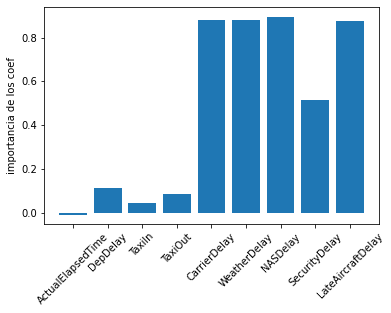

In [22]:
# model de regressio 2: Lasso Regressor
# model lineal pero que penalitza incloure moltes variables o variables amb coficients grans
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X,y)
print(lasso_model.coef_)
plt.bar(X.columns,lasso_model.coef_)
plt.xticks(rotation=45)
plt.ylabel('importancia de los coef')
plt.show()

tanto ActualElapseTime, TaxiIn como TaxiOut por ejemplo no afecta mucho a ArrDelay asi que se podrian despreciar del dataset para quitar variables y minimizar el OVERFITTING

In [14]:
# model de regressio 3: Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor()

# Exercici 2

Compara’ls en base al MSE i al R2 .

In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

In [20]:
modelos = [linear_model,lasso_model,decision_tree_model]
for model in modelos:
    model.fit(X,y)
    y_pred = model.predict(X)    
    R2 = r2_score(y,y_pred) 
    mse = MSE(y,y_pred)
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')
    
    
    

modelo: LinearRegression() R2 score: 0.994104192982526, MSE: 19.512536154786478
modelo: Lasso() R2 score: 0.9939649045113061, MSE: 19.97351992215968
modelo: DecisionTreeRegressor() R2 score: 0.9986824010355969, MSE: 4.360674858289401


# Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

In [21]:
# find the best alpha parameter
from sklearn.linear_model import LassoCV
alpha = np.logspace(-8, 2, 10)
print(alpha)
lasso_model = LassoCV(alphas=alpha)
lasso_model.fit(X, y)
print(f'the best alpha is {lasso_model.alpha_}')


[1.00000000e-08 1.29154967e-07 1.66810054e-06 2.15443469e-05
 2.78255940e-04 3.59381366e-03 4.64158883e-02 5.99484250e-01
 7.74263683e+00 1.00000000e+02]


/home/vant/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


the best alpha is 1e-08


In [25]:
linear = LinearRegression()
lasso = Lasso(alpha=1E-8,normalize=False) # if normalize =True all variable are in the same scale
tree = DecisionTreeRegressor(criterion='mse',max_depth= 20,min_samples_leaf=1)
# for tree, the higher the max_depth can lead to OVERFITTING...

In [26]:
modelos = [linear,lasso,tree]
for model in modelos:
    model.fit(X,y)
    y_pred = model.predict(X)    
    R2 = r2_score(y,y_pred) 
    mse = MSE(y,y_pred)
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')
    

modelo: LinearRegression() R2 score: 0.994104192982526, MSE: 19.512536154786478
modelo: Lasso(alpha=1e-08) R2 score: 0.994104192982526, MSE: 19.512536154786467
modelo: DecisionTreeRegressor(max_depth=20) R2 score: 0.9956888179523392, MSE: 14.268122298699204


# Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)



In [27]:
from sklearn.model_selection import train_test_split,cross_val_score

In [28]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)

In [29]:
modelos = [linear,lasso,tree]
for model in modelos:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)    
    R2 = r2_score(y_test,y_pred) 
    mse = MSE(y_test,y_pred)
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')
    

modelo: LinearRegression() R2 score: 0.9941003341357127, MSE: 19.567648060889596
modelo: Lasso(alpha=1e-08) R2 score: 0.9941003341356831, MSE: 19.56764806098773
modelo: DecisionTreeRegressor(max_depth=20) R2 score: 0.992519507410775, MSE: 24.810836694008298


In [30]:
# calculo R2 score usando cross validation para ser menos sensible a como dividimos los datos entre train i test 
modelos = [linear,lasso,tree]
for model in modelos:
    cv_results = cross_val_score(model, X, y, cv=5)   
    print(f'modelo: {str(model)} R2 score: {np.mean(cv_results)}')

modelo: LinearRegression() R2 score: 0.992493574385203
modelo: Lasso(alpha=1e-08) R2 score: 0.992493574384701
modelo: DecisionTreeRegressor(max_depth=20) R2 score: 0.9908715748027241


### Nivell 2



# Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció



In [31]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [32]:
df_subset.head()

,ArrDelay,ActualElapsedTime,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,-14.0,128.0,8.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0
1,2.0,128.0,19.0,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2,34.0,90.0,34.0,3.0,10.0,2.0,0.0,0.0,0.0,32.0
3,11.0,101.0,25.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0
4,57.0,240.0,67.0,3.0,7.0,10.0,0.0,0.0,0.0,47.0


In [52]:
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df_subset),columns=df_subset.columns)

In [53]:
df_scaler.head()

,ArrDelay,ActualElapsedTime,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,-0.997419,-0.076009,-0.676706,-0.529205,-0.707360,-0.349976,-0.140533,-0.352627,-0.036508,-0.466044
1,-0.719297,-0.076009,-0.472342,-0.340694,-0.569458,-0.349976,-0.140533,-0.352627,-0.036508,-0.466044
2,-0.163054,-0.602769,-0.193663,-0.717716,-0.569458,-0.295637,-0.140533,-0.352627,-0.036508,0.411752
3,-0.562853,-0.450286,-0.360870,-0.529205,-0.569458,-0.349976,-0.140533,-0.352627,-0.036508,-0.466044
4,0.236746,1.476549,0.419429,-0.717716,-0.776310,-0.078283,-0.140533,-0.352627,-0.036508,0.823218


<AxesSubplot:xlabel='ArrDelay', ylabel='Count'>

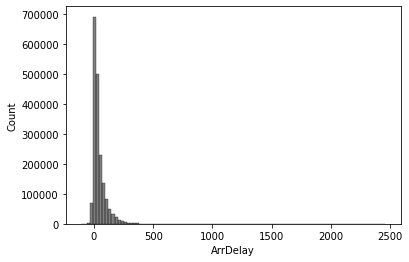

In [35]:
sns.histplot(df_subset['ArrDelay'],color='black',alpha=0.5,bins=100)

(-2.0, 5.0)

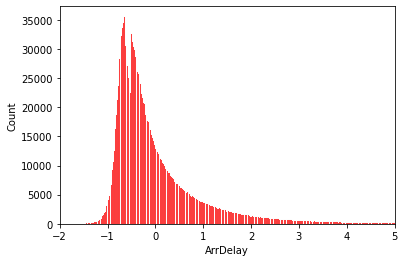

In [39]:
sns.histplot(df_scaler['ArrDelay'],color='red')
plt.xlim([-2,5])

In [57]:
X_new,y_new = get_X_y_from_dataset(dataframe=df_scaler,target_colum='ArrDelay')

X_train_new,X_test_new,y_train_new, y_test_new = train_test_split(X_new,y_new,test_size=0.3)

(1857423, 9) (1857423, 1)


In [55]:
df_scaler.head()

,ArrDelay,ActualElapsedTime,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,-0.997419,-0.076009,-0.676706,-0.529205,-0.707360,-0.349976,-0.140533,-0.352627,-0.036508,-0.466044
1,-0.719297,-0.076009,-0.472342,-0.340694,-0.569458,-0.349976,-0.140533,-0.352627,-0.036508,-0.466044
2,-0.163054,-0.602769,-0.193663,-0.717716,-0.569458,-0.295637,-0.140533,-0.352627,-0.036508,0.411752
3,-0.562853,-0.450286,-0.360870,-0.529205,-0.569458,-0.349976,-0.140533,-0.352627,-0.036508,-0.466044
4,0.236746,1.476549,0.419429,-0.717716,-0.776310,-0.078283,-0.140533,-0.352627,-0.036508,0.823218


In [56]:
modelos = [linear,lasso,tree]
for model in modelos:
    model.fit(X_train_new,y_train_new)
    y_pred = model.predict(X_test_new)    
    R2 = r2_score(y_test_new,y_pred) 
    mse = MSE(y_test_new,y_pred)
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')

modelo: LinearRegression() R2 score: 0.9941721711483136, MSE: 0.005924418517287493
modelo: Lasso(alpha=1e-08) R2 score: 0.9941721712320865, MSE: 0.0059244184321262
modelo: DecisionTreeRegressor(max_depth=20) R2 score: 0.9926347452392364, MSE: 0.007487325520306019


+ R2 score se mantien igual pero MSE baja

### Nivell 3


# Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

In [59]:
df_final = df_scaler.drop('DepDelay',axis=1)
X,y = get_X_y_from_dataset(dataframe=df_final,target_colum='ArrDelay')

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3)
modelos = [linear,lasso,tree]
for model in modelos:
    model.fit(X_train_new,y_train_new)
    y_pred = model.predict(X_test_new)    
    R2 = r2_score(y_test_new,y_pred) 
    mse = MSE(y_test_new,y_pred)
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')

(1857423, 8) (1857423, 1)
modelo: LinearRegression() R2 score: 0.9941612546976005, MSE: 0.005888681912604609
modelo: Lasso(alpha=1e-08) R2 score: 0.9941612547282969, MSE: 0.0058886818816457345
modelo: DecisionTreeRegressor(max_depth=20) R2 score: 0.992982769404113, MSE: 0.007077246351128528


+ el resultat final no varia massa per tant DepDelay no es una de les variables que serveixen a l'hora de contruir aquesta regressio per predir el ArrDelay

### como es possible que DepDelay no importe si tiene una fuerte correlation con ArrDelay ?

